In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point
import numpy as np

from pathlib import Path

from asim.dataset.maps.gpkg.gpkg_map import GPKGMap

from asim.common.visualization.maps.plot_maps import _plot_map_on_ax
from asim.common.geometry.base import Point2D
from asim.dataset.maps.map_datatypes import MapSurfaceType



map_file_path = Path("/home/daniel/asim_workspace/asim/notebooks/carla_town03.gpkg")

map_api = GPKGMap(map_file_path)
map_api.initialize()

/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:66: UserWarning: GPKGMap: intersection not available in /home/daniel/asim_workspace/asim/notebooks/carla_town03.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")
/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:66: UserWarning: GPKGMap: crosswalk not available in /home/daniel/asim_workspace/asim/notebooks/carla_town03.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")


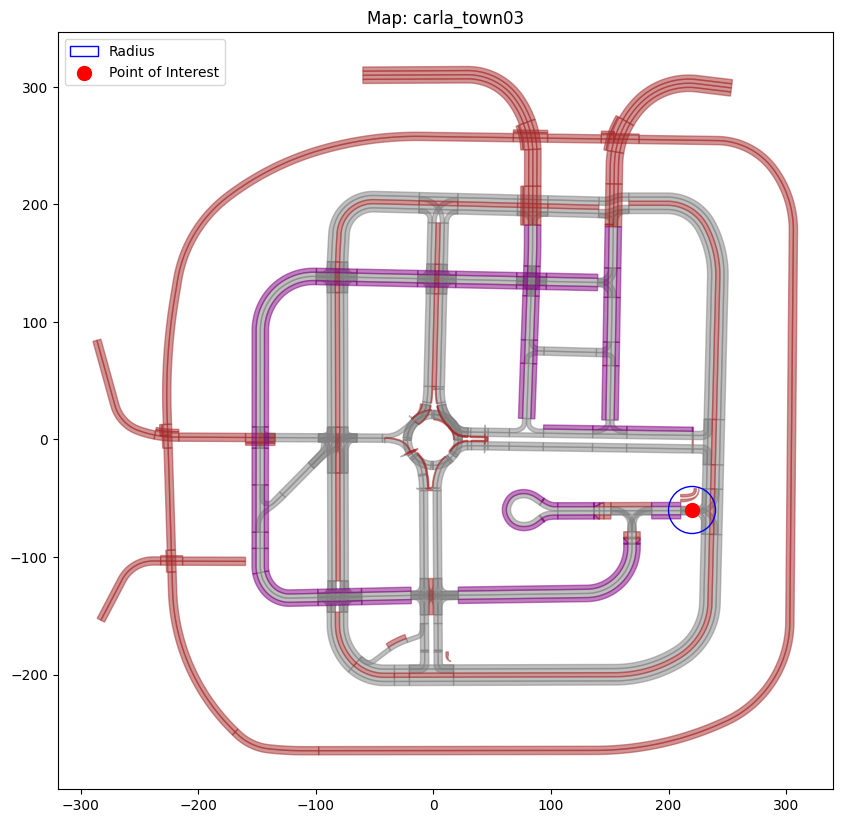

In [2]:
from matplotlib.patches import Circle


radius=20
point_2d = Point2D(220, -60)

fig, ax = plt.subplots(figsize=(10, 10))
_plot_map_on_ax(ax, map_api, point_2d, radius=1000)

# Add a circle with the specified radius
circle = Circle((point_2d.x, point_2d.y), radius=radius, color="blue", fill=False, label="Radius")
ax.add_patch(circle)

# Highlight the point of interest
ax.scatter(point_2d.x, point_2d.y, color="red", s=100, label="Point of Interest")

ax.set_aspect("equal", adjustable="box")
ax.legend()

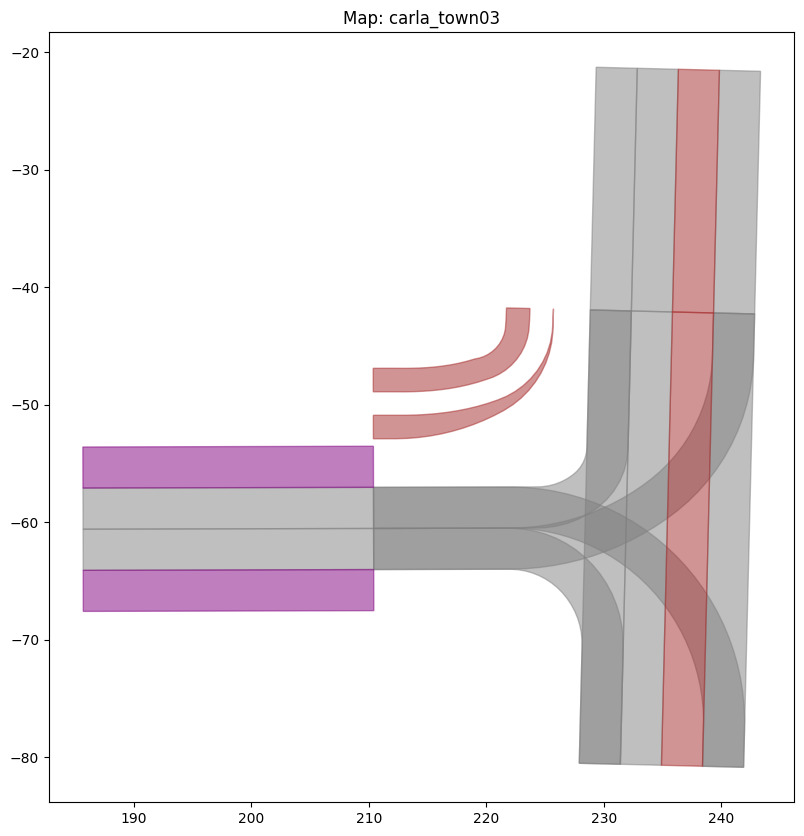

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

_plot_map_on_ax(ax, map_api, point_2d, radius=20)

ax.set_aspect("equal", adjustable="box")


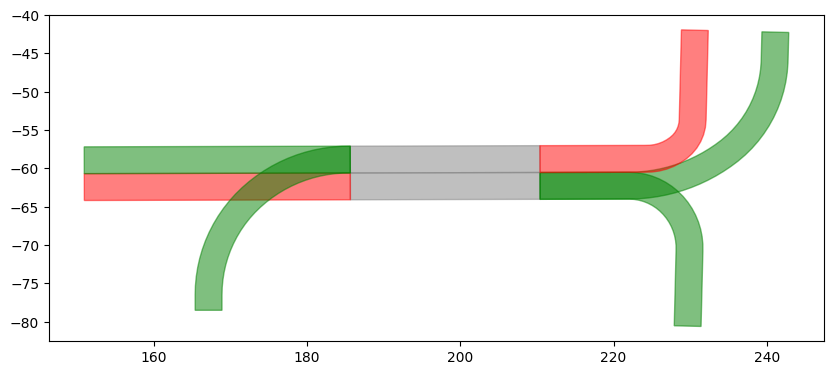

In [7]:
import ast

def plot_lane(ax, lane, color):
    ax.fill(*lane.shapely_polygon.exterior.xy, color=color, alpha=0.5)


map_objects_dict = map_api.get_proximal_map_objects(point_2d, radius=radius, layers=[MapSurfaceType.LANE_GROUP])
lane = map_objects_dict[MapSurfaceType.LANE_GROUP][3]

fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

# ax.set_aspect("equal", adjustable="box")



lane = map_objects_dict[MapSurfaceType.LANE_GROUP][1]

# fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

ax.set_aspect("equal", adjustable="box")

In [5]:
lane._lane_row

AttributeError: 'GPKGLaneGroup' object has no attribute '_lane_row'